# KMeans

Material complementario al curso MA5406:Probabilidades y Estadística en el Análisis de Datos

**Creado por:** Francisco Vásquez Leiva

**Mail:** fvasquez@dim.uchile.cl

Este material va más enfocado a una implementación simple de los algoritmos estudiados y casos de ínteres. No se ahondará en conocer profundamente los distintos usos de los algoritmos implementados, para esto, leer la documentación de cada función según la librería que corresponda.

La idea es complementar los contenidos teóricos vistos en clases con aplicaciones de los métodos estudiados a distintos casos de interes, por lo cual, insto a que vean los ppt de las presentaciones antes de estudiar cada uno de estos notebooks.

Cualquier duda puedes escribirme!

**Nota:** Las tildes en los comentarios fueron eliminadas a propósito.

# Importación de librerías



In [78]:
from sklearn import datasets

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import pandas as pd

# Parámetros para gráficos
plt.style.use('seaborn')

plt.rcParams.update({'font.size': 25})      
plt.rc('axes', labelsize=20)
plt.rc('legend', fontsize=18)  
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.rcParams['axes.titlesize'] = 25
plt.rcParams["figure.figsize"] = (15,6)

colors = cm.rainbow(np.linspace(0, 1, 10))

# Previos

Primero generamos datasets que pueden ser de ínteres para el estudio del comportamiento del algoritmo de KMeans. La idea es poder obtener datasets en los cuales se sabe que kmeans se comporta bien, se comporta regular y otros en los cuales el comportamiento no es el esperado

In [58]:
# Numero de muestras
n_sample = 2000
# Numero de centros
n_centers = 4
# Fijamos la semilla
rs = 10


# Generación de blobs con igual std
blobs = datasets.make_blobs(
    n_samples=n_sample, centers=n_centers, random_state=rs)

# Generación de blobs con std random
blobs_random = datasets.make_blobs(
    n_samples=n_sample, centers = n_centers,
    cluster_std = [np.random.rand()*3 for _ in range(n_centers)], 
    random_state=rs)

# Generación de blobs con Std alta
blobs_h_std = datasets.make_blobs(
    n_samples=n_sample, centers = n_centers, 
    cluster_std=[3]*n_centers, random_state=rs)

# Generación de puntos uniformes en 0, 1
no_structure = np.random.rand(n_sample, 2)

Graficamos los datasets para saber cómo se comportan:

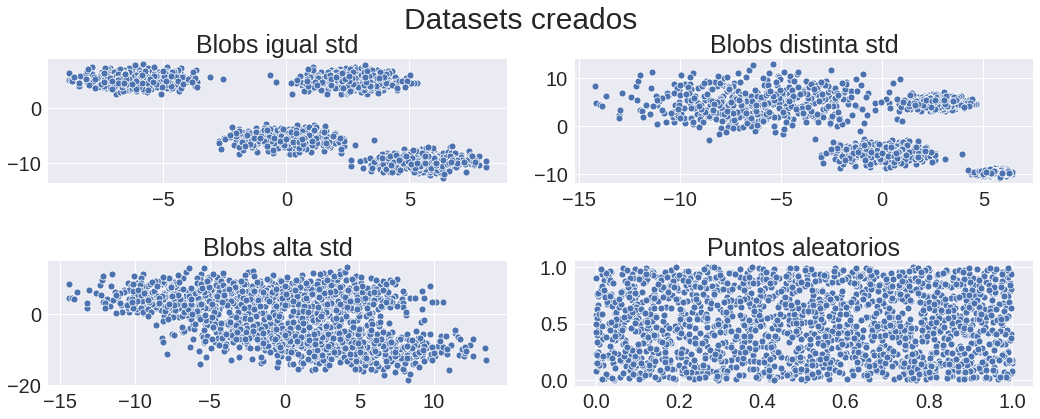

In [59]:
fig, ax = plt.subplots(2, 2)

sns.scatterplot(blobs[0][:,0], blobs[0][:,1], ax=ax[0,0])
ax[0,0].set_title('Blobs igual std')

sns.scatterplot(blobs_random[0][:,0], blobs_random[0][:,1], ax=ax[0,1])
ax[0,1].set_title('Blobs distinta std')

sns.scatterplot(blobs_h_std[0][:,0], blobs_h_std[0][:,1], ax=ax[1,0])
ax[1,0].set_title('Blobs alta std')

sns.scatterplot(no_structure[:,0], no_structure[:,1], ax=ax[1,1])
ax[1,1].set_title('Puntos aleatorios')


fig.suptitle('Datasets creados', size=30, y=1)
fig.tight_layout()
plt.show()

Cada dataset creado cumple con lo siguiente:

    - Blobs igual std: Burbujas con igual forma
    - Blobs distinta std: Burbujas con formas distintas
    - Blobs alta std: Burbujas igual forma pero con alto std
    - Puntos aleatorios: Puntos aleatorios en [0,1]x[0,1]

# Implementación de KMeans

Comencemos a implementar KMeans. Se selecciona en un inicio al dataset con burbujas con igual forma. Dado que ya sabemos cuantos clusters hay, se selecciona un número de clusters a ajustar de $K=4$.

In [61]:
# Importación de KMeans
from sklearn.cluster import KMeans 

K = 4

# Se crea la instancia con el k=4 y random_state fijo
km = KMeans(
    n_clusters=K, random_state=rs)

# Se ajusta el modelo con blobs
km.fit(blobs[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

Con el atributo labels_ se accede a los labels del dataset de ajuste

In [62]:
km.labels_

array([3, 2, 0, ..., 3, 3, 1], dtype=int32)

Se puede realizar una prediccion sobre el dataset de entrenamiento para obtener los mismos labels

In [63]:
km.predict(blobs[0])

array([3, 2, 0, ..., 3, 3, 1], dtype=int32)

De la misma forma se pueden predecir el label de datos que se quieran etiquetar que no pertenezcan al dataset de ajuste

In [64]:
km.predict([
    [15, 15],
    [1, 1]
    ])

array([0, 0], dtype=int32)

y podemos graficar rapidamente con:

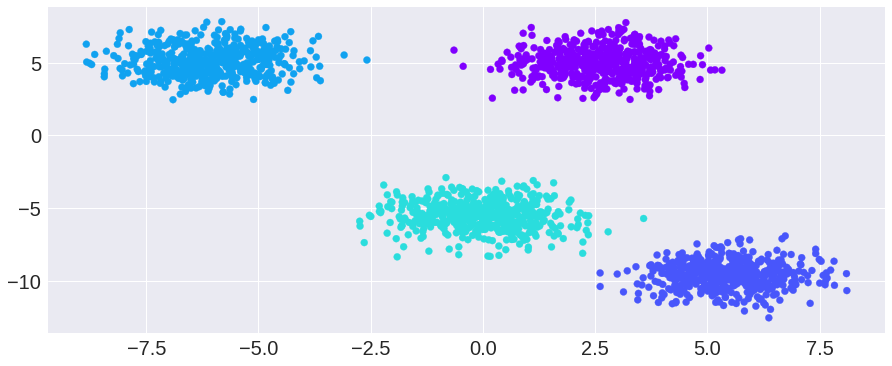

In [65]:
fig, ax = plt.subplots()
plt.scatter(blobs[0][:,0], blobs[0][:,1], c = colors[km.labels_])
plt.show()

Cada color representa a un cluster. Tenemos que KMeans logra clusterizar bien a cada uno de las burbujas, esto es debido a la alta separación de estas además de que tienen una forma buena para kmeans, una forma redonda. 

Con esto, podemos generar una función que aplique kmeans y grafique los resultados obtenidos

In [84]:
def fit_kmeans_and_plot(dataset, ncluster, plot = True):
    '''
    Dado un dataset y un numero de cluster ncluster, ajusta un modelo de KMeans
    y grafica el resultado obtenido de dataset.
    '''
    km = KMeans(n_clusters=ncluster, random_state=rs)
    km.fit(dataset)
    
    if plot:
        fig, ax = plt.subplots()

        plt.scatter(dataset[:,0], dataset[:,1], c = colors[km.labels_])
#     plt.show()
    
    return km.labels_, km.inertia_

Apliquemos la función anterior a los demás datasets

Grafiquemos ahora los resultados de aplicar KMeans con $K=5$ a los demás datasets, después se dirá algo sobre los resultados obtenidos

## Blobs con distinta std

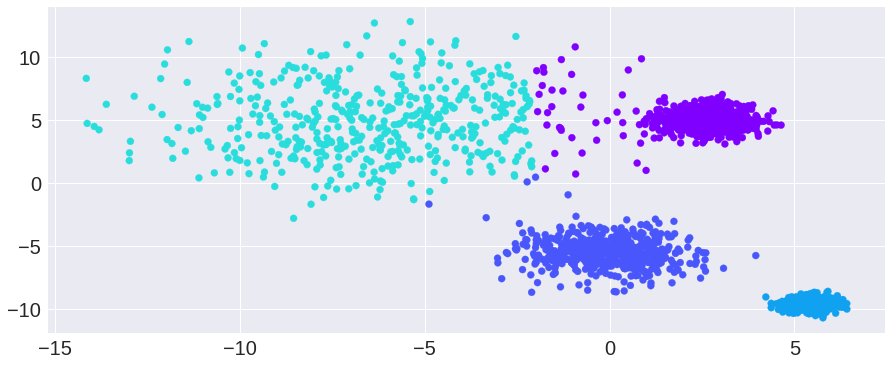

In [74]:
l_blobs_random, l_blobs_random_inertia  = fit_kmeans_and_plot(blobs_random[0], K)

## Blobs con alta std

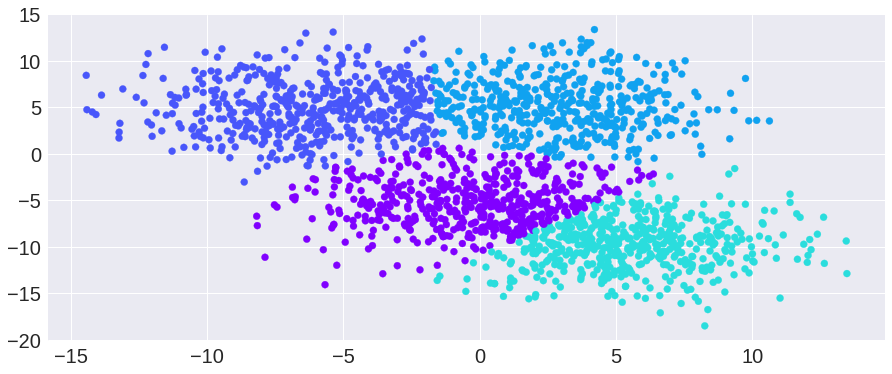

In [75]:
l_blobs_std, l_blobs_std_inertia = fit_kmeans_and_plot(blobs_h_std[0], K)

## Uniforme

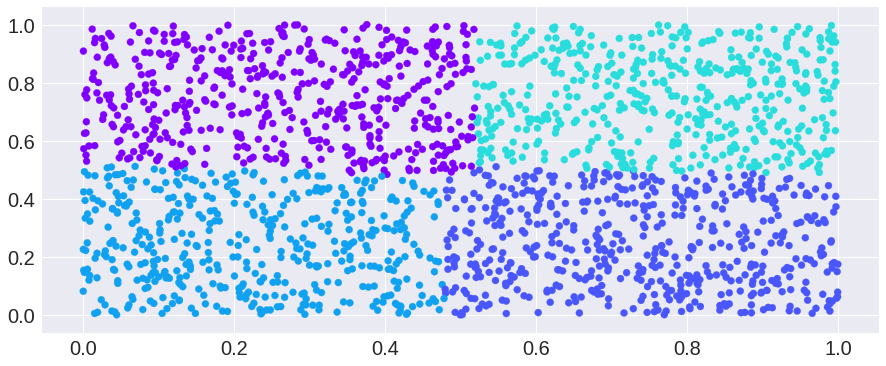

In [76]:
l_uniforme, l_uniforme_inertia = fit_kmeans_and_plot(no_structure, K)

# Comparación

Para poder comparar los resultados obtenidos en los distintos datasets, graficamos lo obtenido para cada uno.

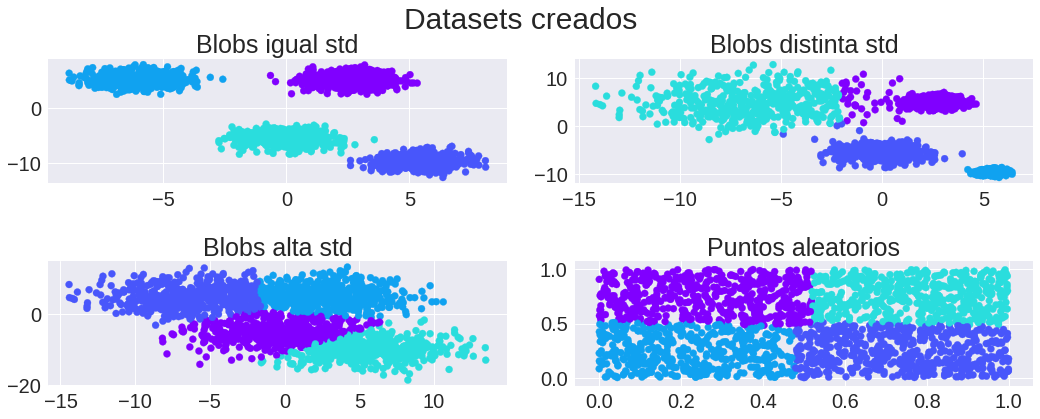

In [77]:
fig, ax = plt.subplots(2,2)

ax[0,0].scatter(blobs[0][:,0], blobs[0][:,1], c = colors[km.labels_])
ax[0,0].set_title('Blobs igual std')

ax[0,1].scatter(blobs_random[0][:,0], blobs_random[0][:,1], c = colors[l_blobs_random])
ax[0,1].set_title('Blobs distinta std')

ax[1,0].scatter(blobs_h_std[0][:,0], blobs_h_std[0][:,1], c = colors[l_blobs_std])
ax[1,0].set_title('Blobs alta std')

ax[1,1].scatter(no_structure[:,0], no_structure[:,1], c = colors[l_uniforme])
ax[1,1].set_title('Puntos aleatorios')

fig.suptitle('Datasets creados', size=30, y=1)
plt.tight_layout()
plt.show()

Sobre el gráfico anterior, para cada uno de los datasets:

    -Blobs igual std: Notamos que por la forma de cada burbuja y la separación de estas, los clusters encontrados por KMeans son casi perfectos, pudiendo lograr captar completamente a cada cluster.
    
    -Blobs distinta std: En los cluster de arriba se puede observar que no se capta bien cada agrupación.
    
    -Blobs alta std: Al tener los puntos juntos, no se logra captar bien cada agrupación de datos, siendo que hay 4 centros. se puede observar que la separación de KMeans logra ajustar de buena forma una partición en el espacio, pueden pensar en los diagramas de Voronoi.
    
    -Puntos aleatorios: Este caso es solo de estudio. Notamos que al ajustar 4 cluster se observa de buena forma una partición del espacio en 4 cuadrantes. Notar que en verdad solo hay 1 cluster. 

Veamos ahora como se comporta la suma intracluster (SSW)

In [83]:
df_inertia = pd.DataFrame(
    data = [['Igual std', km.inertia_],
            ['Distinta std', l_blobs_random_inertia], 
            ['Alta std', l_blobs_std_inertia], 
            ['Uniforme', l_uniforme_inertia]],
    columns = ['Dataset', 'SSW']
)

df_inertia

,Dataset,SSW
0,Igual std,3910.680237
1,Distinta std,9652.118480
2,Alta std,29753.936112
3,Uniforme,84.747021


Solo es comparable la SSW de los blobs entre si. Notar que a medida que no se ajustan bien los clusters, la SSW aumenta.

Un caso de interes es el caso uniforme, esto porque en verdad hay un puro cluster, si es que obtenemos la SSW de un rango de K se obtiene que:

In [93]:
for k in range(2, 8):
    _, inertia = fit_kmeans_and_plot(no_structure, k, plot = False)
    print('K={}, {:.2f}'.format(k, inertia))

K=2, 211.26
K=3, 133.91
K=4, 84.75
K=5, 70.16
K=6, 59.06
K=7, 50.14


De donde se disminuye la SSW a medida que se aumenta la cantidad de clusters (lo cual es esperable), pero se sabe que esto es contraintuitivo dado que en verdad solo tenemos 1 cluster.

Lo anterior se tiene que tener a considerar, dado que es algo que se querrá como no en ciertas clusterizaciones, clusterizar donde en verdad no hay una clusterización clara.

Notar que estas visualizaciones son posibles hasta $\mathbb{R}^3$, después tienen que utilizar su imaginación para poder realizar estar mismas interpretaciones.